<a href="https://colab.research.google.com/github/buisonanh/phishing_urls_detection/blob/main/phishing_urls_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare Data**

In [273]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [274]:
# Import data
legit = pd.read_csv("datasets/FinalDataset/URL/Benign_list_big_final.csv")
phishing = pd.read_csv("datasets/phishing_urls.csv")

In [275]:
legit.columns = ['url']

In [276]:
# Drop duplicates
legit.drop_duplicates()
phishing.drop_duplicates()

print(legit.info())
print()
print(phishing.info())
print()

# Check null values
print(f"Legit null values: {legit.isnull().sum()}")
print(f"Phishing null values: {phishing.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35377 entries, 0 to 35376
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     35377 non-null  object
dtypes: object(1)
memory usage: 276.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56591 entries, 0 to 56590
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     56591 non-null  object
dtypes: object(1)
memory usage: 442.2+ KB
None

Legit null values: url    0
dtype: int64
Phishing null values: url    0
dtype: int64


In [277]:
# add a 'label' column to the dataframes
legit["label"] = 0
phishing["label"] = 1

print(legit)
# combine the two dataframes
df = pd.concat([legit, phishing], ignore_index=True)

# shuffle the dataframe's rows randomly
df = df.sample(frac=1, random_state=42) # Set random_state to an integer for reproducibility

df.info()

                                                     url  label
0      http://1337x.to/torrent/1110018/Blackhat-2015-...      0
1      http://1337x.to/torrent/1122940/Blackhat-2015-...      0
2      http://1337x.to/torrent/1124395/Fast-and-Furio...      0
3      http://1337x.to/torrent/1145504/Avengers-Age-o...      0
4      http://1337x.to/torrent/1160078/Avengers-age-o...      0
...                                                  ...    ...
35372  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35373  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35374  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35375  https://lastpass.com/signup2.php?ac=1&from_uri...      0
35376  https://asana.com/guide/videos/%22//fast.wisti...      0

[35377 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 91968 entries, 77897 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     91968 non-null

In [278]:
# Identify duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates: {num_duplicates}")

df = df.drop_duplicates()

duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates: {num_duplicates}")


Number of duplicates: 4
Number of duplicates: 0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91964 entries, 77897 to 15795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     91964 non-null  object
 1   label   91964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [280]:
print(df.isnull().sum())
df.dropna(inplace = True)

df.head(10)

url      0
label    0
dtype: int64


,url,label
77897,https://trustipad.com/titano/?prt=440211,1
69293,https://www.mygov-user.20-245-45-137.plesk.pag...,1
54369,https://trekdriving.com.au/jumperr/updation/in...,1
79462,https://bectchange.com,1
22811,http://plarium.com/fr/jeux-de-strategie/stormf...,0
21247,http://perezhilton.com/2015-05-11-taylor-swift...,0
67217,https://site.desco.resgate.siteempresarial.com...,1
63188,http://currentlyattyahoo736363.weeblysite.com/,1
4940,http://distractify.com/post/related/id/554ce07...,0
63675,https://www-info-cr-mufg.nftstea.com/jp.php,1


In [281]:
"""
# assume `data` is a pandas DataFrame with columns "url" and "label"
counts = df["label"].value_counts()

# print the counts for each category
print(counts)
"""

'\n# assume `data` is a pandas DataFrame with columns "url" and "label"\ncounts = df["label"].value_counts()\n\n# print the counts for each category\nprint(counts)\n'

# **Extracting Features**

In [282]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import re

# 1.Domain of the URL (Domain) 
def getDomain(url):  
        domain = urlparse(url).netloc
        if re.match(r"^www.",domain):
                domain = domain.replace("www.","")
        return domain



In [283]:
def featureExtraction(url,label):
    
    features = []
    features.append(url)
    features.append(getDomain(url))
    features.append(label)

    return features

In [284]:
df.reset_index(drop=True, inplace=True)
df.head(30)

,url,label
0,https://trustipad.com/titano/?prt=440211,1
1,https://www.mygov-user.20-245-45-137.plesk.pag...,1
2,https://trekdriving.com.au/jumperr/updation/in...,1
3,https://bectchange.com,1
4,http://plarium.com/fr/jeux-de-strategie/stormf...,0
5,http://perezhilton.com/2015-05-11-taylor-swift...,0
6,https://site.desco.resgate.siteempresarial.com...,1
7,http://currentlyattyahoo736363.weeblysite.com/,1
8,http://distractify.com/post/related/id/554ce07...,0
9,https://www-info-cr-mufg.nftstea.com/jp.php,1


In [296]:
features = []

for i in range(len(df)):
    url = df['url'][i]
    label = df['label'][i]

    features.append(featureExtraction(url,label))

print(len(features))

91964


In [298]:
#converting the list to dataframe
feature_names = ['url', 'Domain', 'label']

df = pd.DataFrame(features, columns= feature_names)
df

91964

In [ ]:
df.isnull().sum()

url       0
Domain    0
label     0
dtype: int64

In [ ]:
# delete symbols
import re
df["url"] = df["url"].apply(lambda x: re.sub('[/\.;?=https:\']', ' ', x))

# **Vectorizing and Encoding**

In [ ]:
# Data selection
url_df = df['url']
domain_df = df['Domain']
label_df = df['label']

In [302]:
# Transform data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

import scipy.sparse as sp

# Vectorize URLs
vectorizer = CountVectorizer()
url_vec = vectorizer.fit_transform(url_df)

# Vectorize Domains
vectorizer = CountVectorizer()
domain_vec = vectorizer.fit_transform(domain_df)


# Concatenate url_vec, domain_vec, and features_arr as sparse matrices
combined_features_arr = sp.hstack((url_vec, domain_vec), format='csr')

# Encode label column
label_arr = np.asarray(label_df)



In [303]:
combined_features_arr

<91964x164273 sparse matrix of type '<class 'numpy.int64'>'
	with 1236944 stored elements in Compressed Sparse Row format>

In [ ]:
"""
from imblearn.over_sampling import RandomOverSampler

# create a RandomOverSampler object and fit it to the data
oversampler = RandomOverSampler(random_state=42)
combined_features_arr_balanced, label_arr_balanced = oversampler.fit_resample(combined_features_arr, label_arr)

# check the new class distribution
pd.Series(label_arr_balanced).value_counts()
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n\n# create a RandomOverSampler object and fit it to the data\noversampler = RandomOverSampler(random_state=42)\ncombined_features_arr_balanced, label_arr_balanced = oversampler.fit_resample(combined_features_arr, label_arr)\n\n# check the new class distribution\npd.Series(label_arr_balanced).value_counts()\n'

# **Logistic Regression**

In [304]:
# chia tap train, test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(combined_features_arr, label_arr, test_size=0.25, random_state=42)

print('Train: ', x_train.shape[0])
print('Test: ', x_test.shape[0])

Train:  68973
Test:  22991


In [ ]:

# modeling lbfgs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C= 0.01, class_weight= None, max_iter= 100, penalty= 'l2',random_state=42)
lr_lbfgs = logreg.fit(x_train,y_train)


In [ ]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'max_iter': [100, 500, 1000],
              'class_weight': [None, 'balanced']}

grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


# Output:
# Best parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2'}
# Best cross-validation score: 0.9286404335532517
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10],\n              \'penalty\': [\'l1\', \'l2\'],\n              \'max_iter\': [100, 500, 1000],\n              \'class_weight\': [None, \'balanced\']}\n\ngrid_search = GridSearchCV(LogisticRegression(solver=\'lbfgs\'),\n                           param_grid,\n                           cv=5,\n                           scoring=\'accuracy\',\n                           n_jobs=-1)\n\ngrid_search.fit(x_train, y_train)\n\nprint(f"Best parameters: {grid_search.best_params_}")\nprint(f"Best cross-validation score: {grid_search.best_score_}")\n\n\n# Output:\n# Best parameters: {\'C\': 10, \'class_weight\': None, \'max_iter\': 100, \'penalty\': \'l2\'}\n# Best cross-validation score: 0.9286404335532517\n'

In [ ]:
x_test

<22991x164273 sparse matrix of type '<class 'numpy.int64'>'
	with 309916 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred=logreg.predict(x_test)
print(y_pred)

[1 1 0 ... 1 1 0]


In [ ]:
from sklearn.metrics import jaccard_score
print(f"Jaccard score: {jaccard_score(y_test, y_pred,pos_label=0)}")

Jaccard score: 0.9416526138279933


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")


Accuracy: 0.98
F1 score: 0.98


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8376,   413],
       [  106, 14096]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

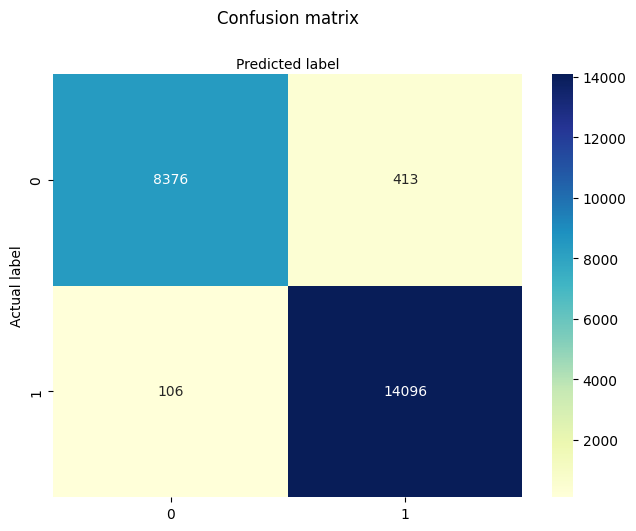

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
"""
new_url = input('Enter an URL to test: ')

# Transform features into same format as training data
new_vector = vectorizer.transform([new_url])

# Make prediction using trained model
prediction = logreg.predict(new_vector)

if prediction[0] == 0:
  print('Legitimate')
else:
  print('Phishing')
"""

"\nnew_url = input('Enter an URL to test: ')\n\n# Transform features into same format as training data\nnew_vector = vectorizer.transform([new_url])\n\n# Make prediction using trained model\nprediction = logreg.predict(new_vector)\n\nif prediction[0] == 0:\n  print('Legitimate')\nelse:\n  print('Phishing')\n"

# **(Test)**

In [ ]:




import pickle

# Preprocess the URL
def preprocess_url(url):
    url = re.sub('[/\.;?=https:\']', ' ', url)
    return url

# Save the vectorizer and model after training
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(logreg, f)

# Extract features
def extract_features(url):
    domain = getDomain(url)
    return f"{url} {domain}"  # Combine the URL and domain as a string

# Load the vectorizer and model before testing
with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("model.pkl", "rb") as f:
    logreg = pickle.load(f)

# Preprocess the test URL
test_url = 'http://example.com/phishing'
preprocessed_url = preprocess_url(test_url)

# Extract features from the preprocessed URL
test_features = extract_features(preprocessed_url)

# Use the same vectorizer instance from training to transform test features
test_feature_vector = vectorizer.transform([test_features])

# Perform prediction
prediction = logreg.predict(test_feature_vector)

# Interpret the prediction
if prediction == 0:
    print("The URL is classified as legitimate.")
else:
    print("The URL is classified as phishing.")



ValueError: X has 49061 features, but LogisticRegression is expecting 164273 features as input.